# Hand-Written Digits Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# i.e. 60000 batches or picture with size of 28x28 pixels

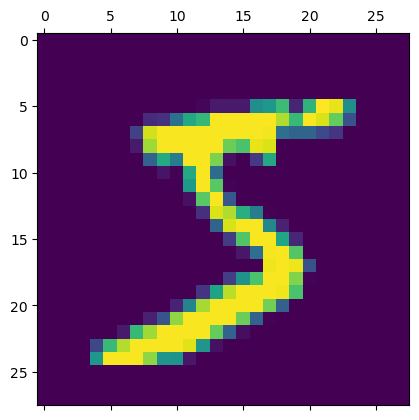

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
x_train  = X_train.reshape(len(X_train),28*28)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_test = X_test.reshape(len(X_test),28*28)

In [14]:
x_test.shape

(10000, 784)

In [16]:
# scaling to improve accuracy even more

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_train1 = scalar.fit_transform(x_train)
x_test1 = scalar.fit_transform(x_test)

In [18]:
x_train1[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model1.fit(x_train1,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 765us/step - loss: 0.4767 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.3043 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 683us/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.2667 - accuracy: 0.9251


In [20]:
model1.evaluate(x_test1,y_test)

313/313 [==============================] - 0s 704us/step - loss: 0.2672 - accuracy: 0.9246


[0.2671641409397125, 0.9246000051498413]

In [21]:
model1.predict(x_test1)

313/313 [==============================] - 0s 580us/step


array([[2.25999113e-02, 3.76594613e-07, 9.07370821e-02, ...,
        9.99787092e-01, 9.14344639e-02, 6.56322837e-01],
       [3.34417552e-01, 4.56766784e-03, 9.98805165e-01, ...,
        7.98629880e-13, 6.62373379e-02, 2.22057661e-09],
       [3.48170986e-04, 9.92642045e-01, 6.31135404e-01, ...,
        1.38723612e-01, 3.98543000e-01, 4.53632213e-02],
       ...,
       [3.53570840e-06, 6.38096481e-06, 1.71564659e-03, ...,
        2.49547780e-01, 5.44351935e-01, 7.44082391e-01],
       [1.10052526e-04, 2.68729200e-04, 2.26671764e-04, ...,
        5.63952308e-05, 7.31149137e-01, 1.00998775e-04],
       [7.01259915e-03, 5.00468833e-10, 1.31599858e-01, ...,
        1.08690239e-08, 1.68559505e-04, 8.20140599e-07]], dtype=float32)

In [22]:
y_predicted = model1.predict(x_test1)

313/313 [==============================] - 0s 572us/step


In [23]:
x_test.shape

(10000, 784)

In [24]:
# checking result

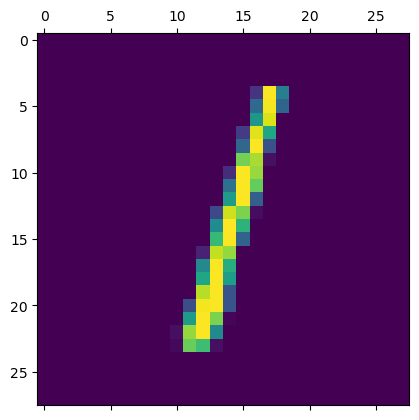

In [25]:
plt.matshow(X_test[2])

In [26]:
y_predicted[2] # here we want to check for maximum value (i.e. probability) and it's index will be our number

array([3.4817099e-04, 9.9264205e-01, 6.3113540e-01, 3.1580898e-01,
       2.3823559e-02, 9.4738618e-02, 1.4596345e-01, 1.3872361e-01,
       3.9854300e-01, 4.5363221e-02], dtype=float32)

In [27]:
np.argmax(y_predicted[2]) # this returns the maximum value index

1

In [28]:
# using confusion matrix for evaluation

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  925,   22,    8,    3,   12,    9,   33,    5],
       [   1,    0,   15,  942,    0,   19,    2,    9,   11,   11],
       [   1,    1,    6,    2,  909,    0,    9,    4,    9,   41],
       [   8,    3,    3,   44,    8,  773,   13,    6,   28,    6],
       [  10,    3,    7,    2,    7,   16,  909,    2,    2,    0],
       [   1,    6,   22,   11,    7,    0,    0,  944,    2,   35],
       [   6,   11,    6,   38,    9,   29,    9,   12,  845,    9],
       [  11,    7,    1,   14,   24,    5,    0,   23,    3,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

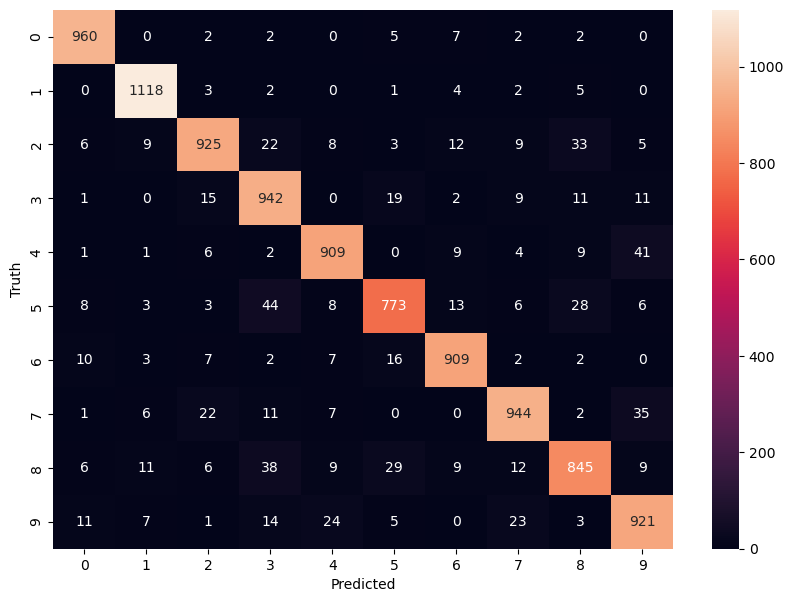

In [32]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# Adding hidden layer to improve performance

In [34]:
model2 = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),# now this will be used as hidden layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model2.fit(x_train1,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2688 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1199 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0833 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0510 - accuracy: 0.9845


In [35]:
model2.evaluate(x_test1,y_test)

313/313 [==============================] - 0s 816us/step - loss: 0.0692 - accuracy: 0.9786


[0.06924168020486832, 0.978600025177002]

In [36]:
y_predicted = model2.predict(x_test1)

313/313 [==============================] - 0s 656us/step


In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [38]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    2,    1,    0,    2,    0,    2,    1],
       [   0, 1122,    5,    0,    0,    1,    3,    1,    3,    0],
       [   5,    0, 1005,    2,    1,    0,    2,    8,    7,    2],
       [   0,    0,    0,  997,    0,    3,    0,    4,    3,    3],
       [   1,    0,    3,    0,  958,    0,    5,    3,    0,   12],
       [   3,    0,    0,   11,    2,  866,    5,    1,    4,    0],
       [   3,    4,    1,    1,    2,    6,  939,    0,    2,    0],
       [   1,    2,    5,    2,    1,    0,    0, 1011,    1,    5],
       [   6,    0,    3,    6,    5,    5,    1,    3,  943,    2],
       [   3,    4,    0,    6,    8,    7,    0,    6,    1,  974]])>

Text(95.72222222222221, 0.5, 'Truth')

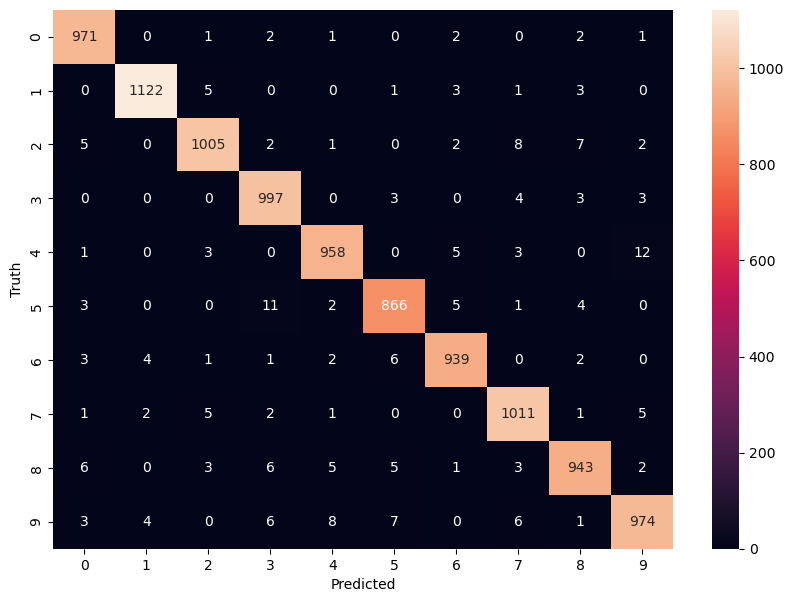

In [39]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')